# Exploring the datasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import numpy as np

## Preliminary and general analysis of train part

In [4]:
folder_selector='.\\datasets\\CICDDoS2019\\original\\train'

In [5]:
def serch_csvs_in_folder(path):
    csv_files = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            csv_file = os.path.join(dirname, filename)
            csv_files.append(csv_file)
    return csv_files

In [6]:
csv_files=serch_csvs_in_folder(folder_selector)
csv_files

['.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_DNS.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_LDAP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_MSSQL.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_NetBIOS.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_NTP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_SNMP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_SSDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_UDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\Syn.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\TFTP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\UDPLag.csv']

In [7]:
sizes = [str(os.path.getsize(file)/(2.0**30)) + " GB" for file in csv_files]
sizes

['1.9867978505790234 GB',
 '0.8543043183162808 GB',
 '1.7594376169145107 GB',
 '1.5809012847021222 GB',
 '0.6007110755890608 GB',
 '2.02337262686342 GB',
 '1.1666549546644092 GB',
 '1.4026084644719958 GB',
 '0.5935431709513068 GB',
 '8.663172940723598 GB',
 '0.14711988158524036 GB']

In [2]:
selected_csv_files=[]
selected_csv_files.append(csv_files[0])
selected_csv_files

NameError: name 'csv_files' is not defined

In [14]:
if len(selected_csv_files) > 1:
    df = pd.concat([pd.read_csv(file) for file in selected_csv_files], ignore_index=True)
else:
    df=pd.read_csv(selected_csv_files[0])

df.columns = df.columns.str.strip()
print("Original length of df:", len(df))

C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\274156238.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(selected_csv_files[0])


Original length of df: 5074413


In [15]:
#df.describe()
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074413 entries, 0 to 5074412
Data columns (total 88 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   Flow ID                      object 
 2   Source IP                    object 
 3   Source Port                  int64  
 4   Destination IP               object 
 5   Destination Port             int64  
 6   Protocol                     int64  
 7   Timestamp                    object 
 8   Flow Duration                int64  
 9   Total Fwd Packets            int64  
 10  Total Backward Packets       int64  
 11  Total Length of Fwd Packets  float64
 12  Total Length of Bwd Packets  float64
 13  Fwd Packet Length Max        float64
 14  Fwd Packet Length Min        float64
 15  Fwd Packet Length Mean       float64
 16  Fwd Packet Length Std        float64
 17  Bwd Packet Length Max        float64
 18  Bwd Packet Length Min        float64
 19  

In [1]:
first_row=df.iloc[0,:]
first_row

NameError: name 'df' is not defined

In [17]:
columns = df.columns.to_list()
columns.sort()
columns

['ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Bwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd PSH Flags',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets/s',
 'Bwd URG Flags',
 'CWE Flag Count',
 'Destination IP',
 'Destination Port',
 'Down/Up Ratio',
 'ECE Flag Count',
 'FIN Flag Count',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow ID',
 'Flow Packets/s',
 'Fwd Avg Bulk Rate',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Header Length',
 'Fwd Header Length.1',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length

In [20]:
df.drop(['Unnamed: 0','Timestamp','Source Port','Source IP','SimillarHTTP',
'Protocol','Flow ID','Destination IP'], axis=1, inplace=True)

KeyError: "['Unnamed: 0', 'Timestamp', 'Source Port', 'Source IP', 'SimillarHTTP', 'Protocol', 'Flow ID', 'Destination IP'] not found in axis"

In [21]:
labels_factor = df['Label'].unique().tolist()
labels_factor.sort()
labels_factor

['BENIGN', 'DrDoS_DNS']

In [22]:
labels_count = df['Label'].value_counts(sort=True, ascending=True)
labels_count

BENIGN          3402
DrDoS_DNS    5071011
Name: Label, dtype: int64

---
## Analyzing train dataset part

In [23]:
del df

In [27]:
folder_selector='.\\datasets\\CICDDoS2019\\original\\train'

In [28]:
csv_files = serch_csvs_in_folder(folder_selector)
csv_files

['.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_DNS.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_LDAP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_MSSQL.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_NetBIOS.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_NTP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_SNMP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_SSDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_UDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\Syn.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\TFTP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\UDPLag.csv']

In [32]:
classes_distribution_train = {}

for ds in csv_files: #for every dataset
    with pd.read_csv(ds, chunksize=10**6) as reader: #that has to be processed in chunks
        for chunk in reader:
            chunk.columns = chunk.columns.str.strip()

            labels_count = chunk['Label'].value_counts()

            for class_,count in labels_count.iteritems():
                #print(class_, count)
                if class_ in classes_distribution_train.keys():
                    classes_distribution_train[class_] += count
                else:
                    classes_distribution_train[class_] = count

classes_distribution_train

C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\2030347237.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\2030347237.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\2030347237.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\2030347237.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\2030347237.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\2030347237.py

{'DrDoS_DNS': 5071011,
 'BENIGN': 56863,
 'DrDoS_LDAP': 2179930,
 'DrDoS_MSSQL': 4522492,
 'DrDoS_NetBIOS': 4093279,
 'DrDoS_NTP': 1202642,
 'DrDoS_SNMP': 5159870,
 'DrDoS_SSDP': 2610611,
 'DrDoS_UDP': 3134645,
 'Syn': 1582289,
 'TFTP': 20082580,
 'UDP-lag': 366461,
 'WebDDoS': 439}

In [33]:
dict_={}

for k,v in classes_distribution_train.items():
    dict_[k.replace('DrDoS_', '')] = classes_distribution_train[k]

dict_['UDPLag'] = dict_.pop('UDP-lag')

classes_distribution_train = dict_

%store classes_distribution_train

Stored 'classes_distribution_train' (dict)


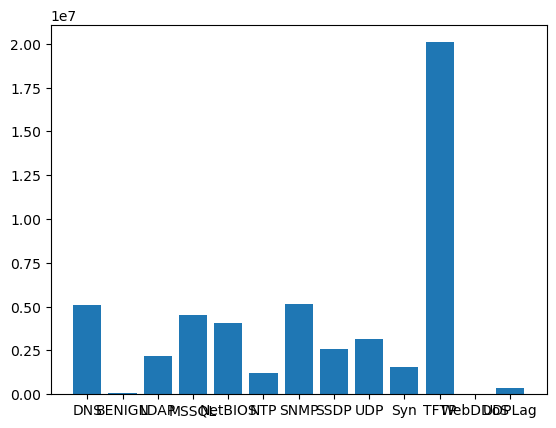

In [34]:
%store -r classes_distribution_train
plt.bar(classes_distribution_train.keys(), classes_distribution_train.values())
plt.show()

---
## Analyzing test dataset part

In [37]:
folder_selector='.\\datasets\\CICDDoS2019\\original\\test'

In [38]:
csv_files = serch_csvs_in_folder(folder_selector)
csv_files

['.\\datasets\\CICDDoS2019\\original\\test\\LDAP.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\MSSQL.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\NetBIOS.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\Portmap.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\Syn.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\UDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\UDPLag.csv']

In [39]:
classes_distribution_test = {}

for ds in csv_files: #for every dataset
    with pd.read_csv(ds, chunksize=10**6) as reader: #that has to be processed in chunks
        for chunk in reader:
            chunk.columns = chunk.columns.str.strip()

            labels_count = chunk['Label'].value_counts()

            for class_,count in labels_count.iteritems():
                #print(class_, count)
                if class_ in classes_distribution_test.keys():
                    classes_distribution_test[class_] += count
                else:
                    classes_distribution_test[class_] = count

classes_distribution_test

C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\770212701.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\770212701.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\770212701.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\770212701.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\770212701.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\770212701.py:5: Dt

{'LDAP': 1915122,
 'NetBIOS': 3657497,
 'BENIGN': 56965,
 'MSSQL': 5787453,
 'Portmap': 186960,
 'Syn': 4891500,
 'UDP': 3867155,
 'UDPLag': 1873}

In [42]:
%store classes_distribution_test

Stored 'classes_distribution_test' (dict)


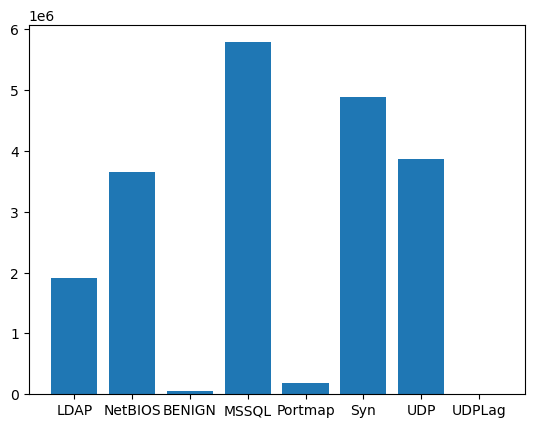

In [43]:
%store -r classes_distribution_test
plt.bar(classes_distribution_test.keys(), classes_distribution_test.values())
plt.show()

---
## Balancing the dataset

As discovered we have too much samples and little computing power. In order to not waste data we have for the benign class, since all classes are skewed, we are going to merge and cut all data we have to the least numerous class.  
Balance classes by cutting them down to the cardinality of 'BENIGN' class (which is the class that has less samples after the merge). This will get us a balanced-by-construction and one-file-only dataset that we will split later in train and test samples for the NN (ignoring the original dataset structure). The resulting csv file will have about 1.3 million observations that are more than enough, anyways.

In [44]:
total_classes_distribution = {}
for k,v in classes_distribution_train.items():
    if k in total_classes_distribution.keys():
        total_classes_distribution[k] += v
    else:
        total_classes_distribution[k] = v

for k,v in classes_distribution_test.items():
    if k in total_classes_distribution.keys():
        total_classes_distribution[k] += v
    else:
        total_classes_distribution[k] = v

total_classes_distribution

{'DNS': 5071011,
 'BENIGN': 113828,
 'LDAP': 4095052,
 'MSSQL': 10309945,
 'NetBIOS': 7750776,
 'NTP': 1202642,
 'SNMP': 5159870,
 'SSDP': 2610611,
 'UDP': 7001800,
 'Syn': 6473789,
 'TFTP': 20082580,
 'WebDDoS': 439,
 'UDPLag': 368334,
 'Portmap': 186960}

In [45]:
del total_classes_distribution['WebDDoS'] #we will drop this label across the dataset
del total_classes_distribution['Portmap'] #we will drop this label across the dataset

min_val=min(total_classes_distribution.values())
smallest_class=[k for k, v in total_classes_distribution.items() if v==min_val][0]
print('The class that has less item is', smallest_class, 'with', min_val, 'items.')

The class that has less item is BENIGN with 113828 items.


In [46]:
seen_class_samples = {}
rows_to_drop=[]

seen_class_samples=seen_class_samples.fromkeys(total_classes_distribution, 0)

only_header=pd.read_csv(csv_files[0], nrows=0)
only_header.columns=only_header.columns.str.strip()
only_header.drop(['Unnamed: 0','Timestamp','Source Port','Source IP','SimillarHTTP','Protocol','Flow ID','Destination IP'], axis=1, inplace=True)
only_header.to_csv('.\\datasets\\CICDDoS2019\\cut\\dataset.csv', mode='w', index=False, header=True) #copy only header to final jumbo csv

In [47]:
folder_selector='.\\datasets\\CICDDoS2019\\original\\train'

csv_files = serch_csvs_in_folder(folder_selector)
csv_files

['.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_DNS.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_LDAP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_MSSQL.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_NetBIOS.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_NTP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_SNMP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_SSDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\DrDoS_UDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\Syn.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\TFTP.csv',
 '.\\datasets\\CICDDoS2019\\original\\train\\UDPLag.csv']

In [48]:
for ds in csv_files: #for every dataset
    print(ds)
    with pd.read_csv(ds, chunksize=10**6) as reader: #that has to be processed in chunks
        for chunk in reader:
            
            rows_to_drop=[] #store rows of the chunk to cut away

            ch_copy=chunk.copy() #duplicate chunk to edit it

            ch_copy.columns = ch_copy.columns.str.strip()

            #drop na and +-inf values
            ch_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
            ch_copy.dropna(inplace=True)

            ch_copy=ch_copy[ch_copy['Label'] != 'WebDDoS'] #drop webddos class
            ch_copy=ch_copy[ch_copy['Label'] != 'Portmap'] #drop portmap class

            #ch_copy.replace({'Label': replacement_dict}, inplace=True)
            #drop useless cols
            ch_copy.drop(['Unnamed: 0','Timestamp','Source Port','Source IP','SimillarHTTP',
            'Protocol','Flow ID','Destination IP'], axis=1, inplace=True)

            #beautify labels (cut and rename some stuff)
            ch_copy['Label']=ch_copy['Label'].str.replace('DrDoS_', '')
            ch_copy['Label']=ch_copy['Label'].str.replace('UDP-lag', 'UDPLag')

            #print(chunk.index)
            #print('Chunk length before drop: ', len(chunk))

            for line_idx in ch_copy.index:
                label = str(ch_copy.loc[line_idx, 'Label'])

                #faster done before
                #label=label.replace('DrDoS_', '')
                #label=label.replace('UDP-lag', 'UDPLag')

                seen_class_samples[label] += 1
                if seen_class_samples[label] > min_val:
                    rows_to_drop.append(line_idx)

            ch_copy.drop(index=rows_to_drop, inplace=True) #finally drop excess

            #print('Chunk length after drop: ', len(ch_copy))

            #append with no header
            ch_copy.to_csv('.\\datasets\\CICDDoS2019\\cut\\dataset.csv', mode='a', index=False, header=False)
            

.\datasets\CICDDoS2019\original\train\DrDoS_DNS.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: Dt

.\datasets\CICDDoS2019\original\train\DrDoS_LDAP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\train\DrDoS_MSSQL.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\train\DrDoS_NetBIOS.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\train\DrDoS_NTP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\train\DrDoS_SNMP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: Dt

.\datasets\CICDDoS2019\original\train\DrDoS_SSDP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\train\DrDoS_UDP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\train\Syn.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\train\TFTP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: Dt

.\datasets\CICDDoS2019\original\train\UDPLag.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\577774841.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


In [49]:
folder_selector='.\\datasets\\CICDDoS2019\\original\\test'

csv_files = serch_csvs_in_folder(folder_selector)
csv_files

['.\\datasets\\CICDDoS2019\\original\\test\\LDAP.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\MSSQL.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\NetBIOS.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\Portmap.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\Syn.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\UDP.csv',
 '.\\datasets\\CICDDoS2019\\original\\test\\UDPLag.csv']

In [50]:
for ds in csv_files: #for every dataset
    print(ds)
    with pd.read_csv(ds, chunksize=10**6) as reader: #that has to be processed in chunks
        for chunk in reader:
            
            rows_to_drop=[] #store rows of the chunk to cut away

            ch_copy=chunk.copy() #duplicate chunk to edit it

            ch_copy.columns = ch_copy.columns.str.strip()

            #drop na and +-inf values
            ch_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
            ch_copy.dropna(inplace=True)

            ch_copy=ch_copy[ch_copy['Label'] != 'WebDDoS'] #drop webddos class
            ch_copy=ch_copy[ch_copy['Label'] != 'Portmap'] #drop portmap class

            #ch_copy.replace({'Label': replacement_dict}, inplace=True)
            #drop useless cols
            ch_copy.drop(['Unnamed: 0','Timestamp','Source Port','Source IP','SimillarHTTP',
            'Protocol','Flow ID','Destination IP'], axis=1, inplace=True)

            #beautify labels (cut and rename some stuff)
            ch_copy['Label']=ch_copy['Label'].str.replace('DrDoS_', '')
            ch_copy['Label']=ch_copy['Label'].str.replace('UDP-lag', 'UDPLag')

            #print(chunk.index)
            #print('Chunk length before drop: ', len(chunk))

            for line_idx in ch_copy.index:
                label = str(ch_copy.loc[line_idx, 'Label'])

                #faster done before
                #label=label.replace('DrDoS_', '')
                #label=label.replace('UDP-lag', 'UDPLag')

                seen_class_samples[label] += 1
                if seen_class_samples[label] > min_val:
                    rows_to_drop.append(line_idx)

            ch_copy.drop(index=rows_to_drop, inplace=True) #finally drop excess

            #print('Chunk length after drop: ', len(ch_copy))

            #append with no header
            ch_copy.to_csv('.\\datasets\\CICDDoS2019\\cut\\dataset.csv', mode='a', index=False, header=False)

.\datasets\CICDDoS2019\original\test\LDAP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\test\MSSQL.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: Dt

.\datasets\CICDDoS2019\original\test\NetBIOS.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\test\Portmap.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\test\Syn.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\test\UDP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


.\datasets\CICDDoS2019\original\test\UDPLag.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_5340\848201903.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


---
## Final dataset

In [51]:
final_ds='.\\datasets\\CICDDoS2019\\cut\\dataset.csv'

In [52]:
sizes = str(os.path.getsize(final_ds)/(2.0**30)) + " GB"
sizes

'0.43928383383899927 GB'

In [53]:
classes_distribution_cut = {}
classes_distribution_cut=classes_distribution_cut.fromkeys(total_classes_distribution, 0)

with pd.read_csv(final_ds, chunksize=10**6) as reader:
    for chunk in reader:
        chunk.columns = chunk.columns.str.strip()
        
        labels_count = chunk['Label'].value_counts()

        for class_,count in labels_count.iteritems():
            #print(class_, count)
            if class_ in classes_distribution_cut.keys():
                classes_distribution_cut[class_] += count
            else:
                classes_distribution_cut[class_] = count

classes_distribution_cut

{'DNS': 113828,
 'BENIGN': 112731,
 'LDAP': 113828,
 'MSSQL': 113828,
 'NetBIOS': 113828,
 'NTP': 113828,
 'SNMP': 113828,
 'SSDP': 113828,
 'UDP': 113828,
 'Syn': 113828,
 'TFTP': 113828,
 'UDPLag': 113828}

In [54]:
%store classes_distribution_cut

Stored 'classes_distribution_cut' (dict)


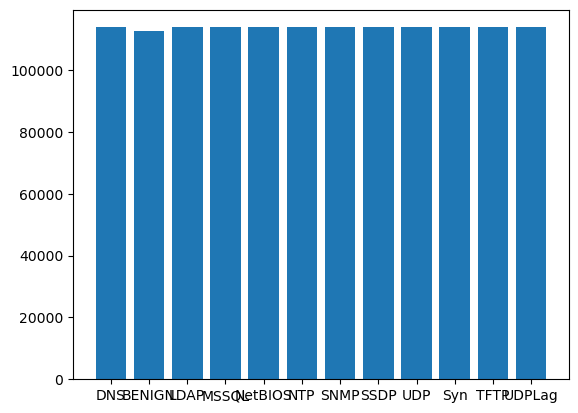

In [55]:
%store -r classes_distribution_cut
plt.bar(classes_distribution_cut.keys(), classes_distribution_cut.values())
plt.show()

---

In [56]:
classes_ids={}
classes_ids=classes_ids.fromkeys(total_classes_distribution)

one_hot_encoding=torch.nn.functional.one_hot(torch.arange(0,len(total_classes_distribution)),num_classes=len(total_classes_distribution))
one_hot_encoding

for idx,(k,_) in enumerate(classes_ids.items()):
    classes_ids[k]=(idx,one_hot_encoding[idx])

classes_ids

{'DNS': (0, tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 'BENIGN': (1, tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 'LDAP': (2, tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 'MSSQL': (3, tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])),
 'NetBIOS': (4, tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])),
 'NTP': (5, tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])),
 'SNMP': (6, tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])),
 'SSDP': (7, tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])),
 'UDP': (8, tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])),
 'Syn': (9, tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])),
 'TFTP': (10, tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])),
 'UDPLag': (11, tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))}

In [57]:
replacement_dict={}
replacement_dict.fromkeys(classes_ids)
for k,(_, tensor) in classes_ids.items():
    replacement_dict[k]=tensor

replacement_dict

{'DNS': tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'BENIGN': tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'LDAP': tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'MSSQL': tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'NetBIOS': tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 'NTP': tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 'SNMP': tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 'SSDP': tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 'UDP': tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 'Syn': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 'TFTP': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 'UDPLag': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [58]:
%store replacement_dict

Stored 'replacement_dict' (dict)
